# Mono resistance EDA

In this POC, we gloss over the resistance towards distinct drugs


In [1]:
# Import the usual suspects.

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_context('paper')



def print_ln():
    print('-' * 80, '\n')


## Data from tb-profiler

In [3]:
tbprofiler_df = pd.read_json("../data/raw/tbprofiler.json", encoding="UTF-8")
tbprofiler_df = tbprofiler_df.transpose()
tbprofiler_df.head()


,rifampicin,isoniazid,pyrazinamide,ethambutol,streptomycin,fluoroquinolones,moxifloxacin,ofloxacin,levofloxacin,ciprofloxacin,...,cycloserine,linezolid,bedaquiline,clofazimine,delamanid,main_lin,sublin,drtype,MDR,XDR
ERR760783,rpoB_p.Ser450Leu,katG_p.Ser315Thr,pncA_p.Gln10Pro,embB_p.Gly406Ala,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,MDR,R,
ERR776661,rpoB_p.Ser450Leu,ahpC_c.-81C>T,pncA_p.Met175Val,"embB_p.Gly406Ser, embB_p.Met306Val, embA_c.-16C>G","rpsL_p.Lys43Arg, rpsL_p.Lys88Gln",-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.3.2,MDR,R,
SRR11098556,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,Sensitive,,
ERR760911,rpoB_p.Ser450Leu,katG_p.Ser315Thr,pncA_p.Gln10Pro,embB_p.Gly406Ala,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,MDR,R,
SRR9224969,rpoB_p.Ser450Leu,"fabG1_c.-15C>T, katG_p.Ser315Thr",pncA_p.Gly132Ser,embB_p.Met306Val,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,MDR,R,


In [4]:
tbprofiler_df.head()

,rifampicin,isoniazid,pyrazinamide,ethambutol,streptomycin,fluoroquinolones,moxifloxacin,ofloxacin,levofloxacin,ciprofloxacin,...,cycloserine,linezolid,bedaquiline,clofazimine,delamanid,main_lin,sublin,drtype,MDR,XDR
ERR760783,rpoB_p.Ser450Leu,katG_p.Ser315Thr,pncA_p.Gln10Pro,embB_p.Gly406Ala,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,MDR,R,
ERR776661,rpoB_p.Ser450Leu,ahpC_c.-81C>T,pncA_p.Met175Val,"embB_p.Gly406Ser, embB_p.Met306Val, embA_c.-16C>G","rpsL_p.Lys43Arg, rpsL_p.Lys88Gln",-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.3.2,MDR,R,
SRR11098556,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,lineage2,lineage2.2.1,Sensitive,,
ERR760911,rpoB_p.Ser450Leu,katG_p.Ser315Thr,pncA_p.Gln10Pro,embB_p.Gly406Ala,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,MDR,R,
SRR9224969,rpoB_p.Ser450Leu,"fabG1_c.-15C>T, katG_p.Ser315Thr",pncA_p.Gly132Ser,embB_p.Met306Val,-,-,-,-,-,-,...,-,-,-,-,-,lineage4,lineage4.1.2.1,MDR,R,


In [6]:
tbprofiler_df.describe().T

,count,unique,top,freq
rifampicin,1321,43,rpoB_p.Ser450Leu,596
isoniazid,1321,43,katG_p.Ser315Thr,732
pyrazinamide,1321,85,-,740
ethambutol,1321,34,-,760
streptomycin,1321,22,-,1160
fluoroquinolones,1321,25,-,1258
moxifloxacin,1321,25,-,1258
ofloxacin,1321,25,-,1258
levofloxacin,1321,25,-,1258
ciprofloxacin,1321,25,-,1258


<AxesSubplot:>

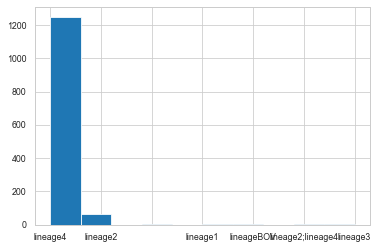

In [8]:
# What's the dristribution of the main lineages
tbprofiler_df["main_lin"].hist()

<AxesSubplot:>

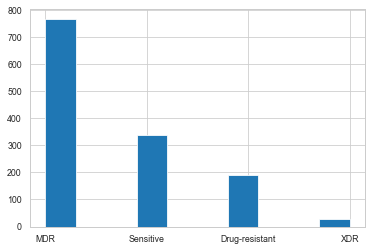

In [9]:
# Plot frequencies of drug resistance profiles
tbprofiler_df["drtype"].hist()

In [10]:
# Find the relationship between drtype and main_lin variables
tbprofiler_df.groupby(['drtype','main_lin']).size()

drtype          main_lin         
Drug-resistant  lineage2               7
                lineage2;lineage4      1
                lineage4             180
                lineageBOV             1
MDR             lineage1               1
                lineage2              29
                lineage3               2
                lineage4             734
Sensitive                              1
                lineage1               2
                lineage2              22
                lineage2;lineage4      1
                lineage4             308
                lineageBOV             3
XDR             lineage2               4
                lineage4              25
dtype: int64

In [11]:
# Find the relationship between drtype and sublin variables

tbprofiler_df.groupby(['drtype','sublin']).size()


drtype          sublin        
Drug-resistant  lineage2.2.1       6
                lineage2.2.1.1     1
                lineage4           5
                lineage4.1         3
                lineage4.1.1       5
                                  ..
XDR             lineage4.1.1       1
                lineage4.1.1.3     3
                lineage4.1.2.1    16
                lineage4.3.3       3
                lineage4.3.4.2     1
Length: 78, dtype: int64

In [13]:
pd.crosstab(index= tbprofiler_df.index, columns=tbprofiler_df["drtype"])

drtype,Drug-resistant,MDR,Sensitive,XDR
row_0,,,,
ERR3087504,0,0,1,0
ERR3129939,0,0,1,0
ERR3129940,0,0,1,0
ERR3148147,1,0,0,0
ERR3148148,0,0,1,0
...,...,...,...,...
SRR9225000,0,1,0,0
SRR9225001,0,1,0,0
SRR9225002,0,1,0,0


In [15]:
pd.crosstab(index= tbprofiler_df['main_lin'], columns=tbprofiler_df["drtype"])

drtype,Drug-resistant,MDR,Sensitive,XDR
main_lin,,,,
,0,0,1,0
lineage1,0,1,2,0
lineage2,7,29,22,4
lineage2;lineage4,1,0,1,0
lineage3,0,2,0,0
lineage4,180,734,308,25
lineageBOV,1,0,3,0


<AxesSubplot:xlabel='main_lin'>

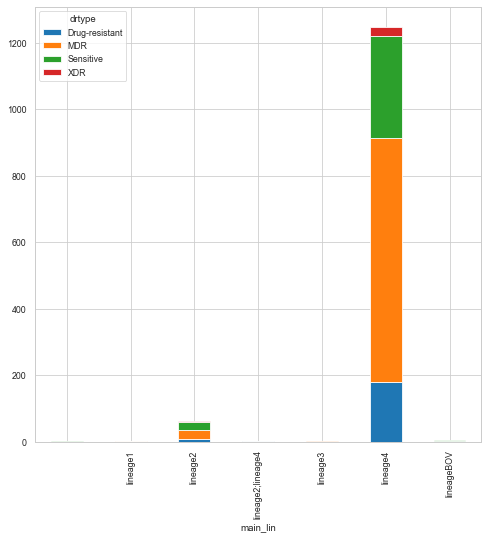

In [16]:
# Stacked Column Chart: visual form of the two-way table

pd.crosstab(index= tbprofiler_df['main_lin'], columns=tbprofiler_df["drtype"])\
                .plot(kind="bar", 
                     figsize=(8,8),
                     stacked=True)

In [17]:
## Find the relationship between sub lineages and drtype variables

pd.crosstab(index= tbprofiler_df['sublin'], columns= tbprofiler_df["drtype"])


drtype,Drug-resistant,MDR,Sensitive,XDR
sublin,,,,
,0,0,1,0
lineage1.2.1,0,1,2,0
lineage2.2,0,0,1,0
lineage2.2.1,6,28,20,4
lineage2.2.1.1,1,0,1,0
lineage2.2.2,0,1,0,0
lineage3,0,2,0,0
lineage4,5,32,4,1
lineage4.1,3,1,2,0


<AxesSubplot:xlabel='sublin'>

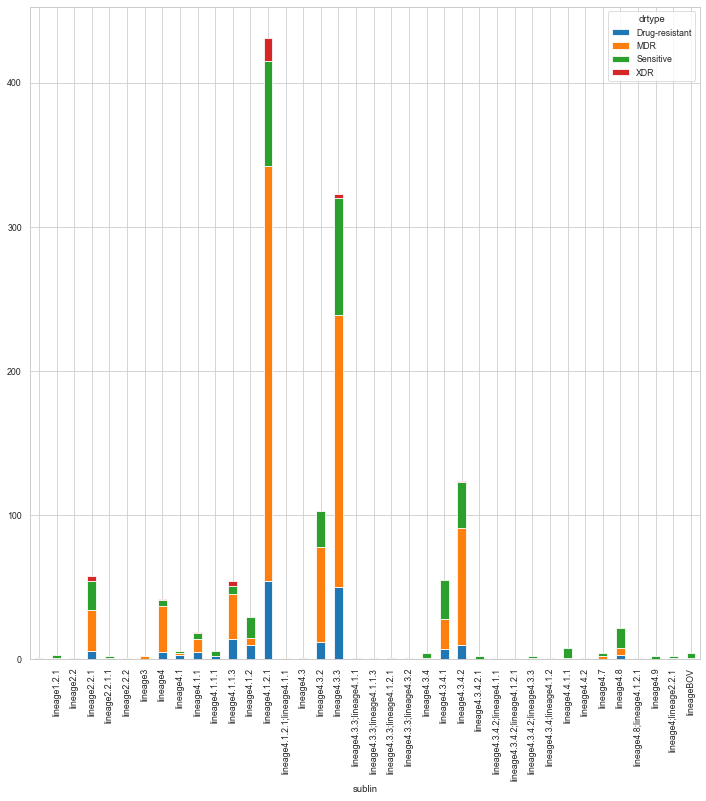

In [19]:
# Stacked Column Chart: visual form of the two-way table

pd.crosstab(index= tbprofiler_df['sublin'], columns= tbprofiler_df["drtype"])\
                .plot(kind="bar", 
                     figsize=(12,12),
                     stacked=True)

## Data from multi-sample cohort variant calling

In [20]:
# import scikit-allel
import allel
